<a href="https://colab.research.google.com/github/Simalg/Simalg/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Görselleştirme için ayarları belirliyoruz
sns.set(style='whitegrid')
%matplotlib inline


In [2]:
# Wine Quality veri setini yüklüyoruz
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# Veri setinin ilk 5 satırını görüntülüyoruz
print(df.head())

# Eksik verileri kontrol ediyoruz
print(df.isnull().sum())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
# Özellikleri ve hedef değişkeni ayırıyoruz
X = df.drop('quality', axis=1)
y = df['quality']

# Veriyi standardize ediyoruz
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# PCA ile boyut indirgeme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# PCA bileşenlerini DataFrame'e dönüştürüyoruz
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['quality'] = y

# PCA bileşenlerinin açıklama oranlarını görüntülüyoruz
print(pca.explained_variance_ratio_)


[0.28173931 0.1750827 ]


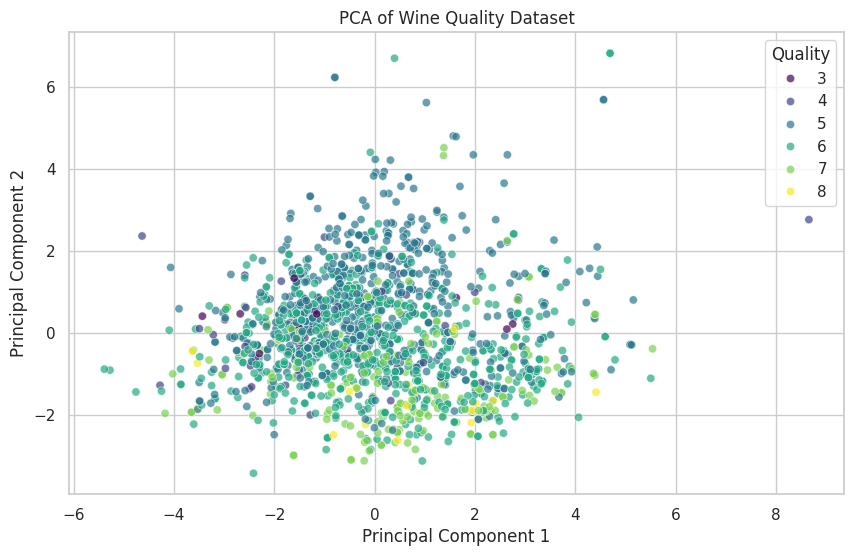

In [5]:
# PCA bileşenlerini görselleştiriyoruz
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='quality', data=df_pca, palette='viridis', alpha=0.7)
plt.title('PCA of Wine Quality Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Quality')
plt.show()
